In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [2]:
BTC_Ticker = yf.Ticker("BTC-USD")
df = BTC_Ticker.history(period="max")

In [3]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-23,38285.281250,39122.394531,37201.816406,37296.570312,21849073843,0,0
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,46383802093,0,0
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,26545599159,0,0
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,17467554129,0,0
2022-02-27,39078.054688,39769.511719,38344.757812,38744.570312,18664433664,0,0


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03,2721.0,2721.0
mean,11390.906697,11696.111340,11052.831664,11403.256869,1.473323e+10,0.0,0.0
std,16149.940449,16581.705921,15650.596633,16152.946426,2.000062e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,607.005005,609.734985,604.606995,606.973022,8.026580e+07,0.0,0.0
50%,6330.770020,6446.259766,6236.470215,6329.950195,5.127130e+09,0.0,0.0
75%,10535.492188,10798.729492,10234.576172,10549.329102,2.460973e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2721 entries, 2014-09-17 to 2022-02-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2721 non-null   float64
 1   High          2721 non-null   float64
 2   Low           2721 non-null   float64
 3   Close         2721 non-null   float64
 4   Volume        2721 non-null   int64  
 5   Dividends     2721 non-null   int64  
 6   Stock Splits  2721 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 170.1 KB


In [6]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-26', '2022-02-27'],
              dtype='datetime64[ns]', name='Date', length=2721, freq=None)

In [7]:
df_close = df['Close']
df_close = df_close.to_frame()

In [8]:
df_close.columns

Index(['Close'], dtype='object')

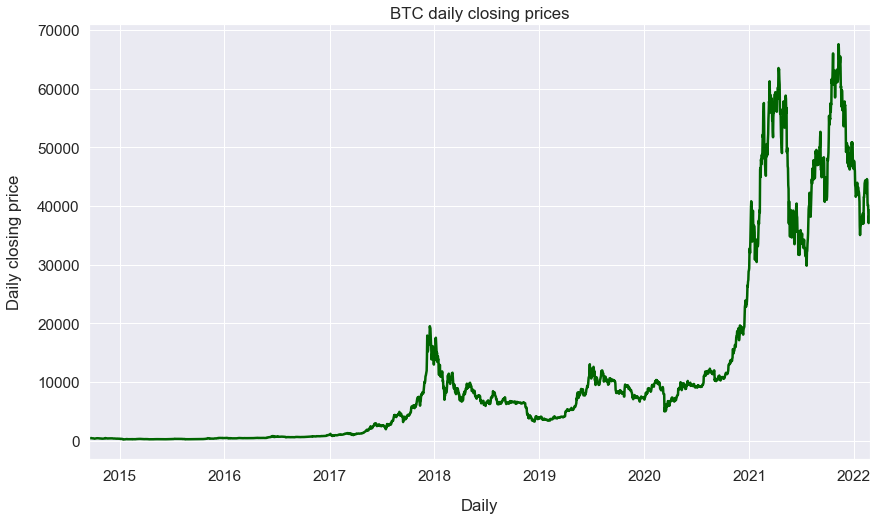

In [9]:
sns.set(font_scale=1.4)
f = df_close['Close'].plot(figsize=(14,8), linewidth=2.5, color='darkgreen')
f.set_xlabel('Daily', labelpad=15)
f.set_ylabel('Daily closing price', labelpad=15)
f.set_title('BTC daily closing prices');

In [10]:
df_close.ta.ema(close='Close', length=10, append=True)
df_close

,Close,EMA_10
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2022-02-23,37296.570312,39490.557926
2022-02-24,38332.609375,39280.021826
2022-02-25,39214.218750,39268.057630


In [11]:
df_close = df_close.iloc[10:]
df_close

,Close,EMA_10
Date,,
2014-09-27,399.519989,413.121615
2014-09-28,377.181000,406.586958
2014-09-29,375.467010,400.928785
2014-09-30,386.944000,398.386097
2014-10-01,383.614990,395.700441
...,...,...
2022-02-23,37296.570312,39490.557926
2022-02-24,38332.609375,39280.021826
2022-02-25,39214.218750,39268.057630


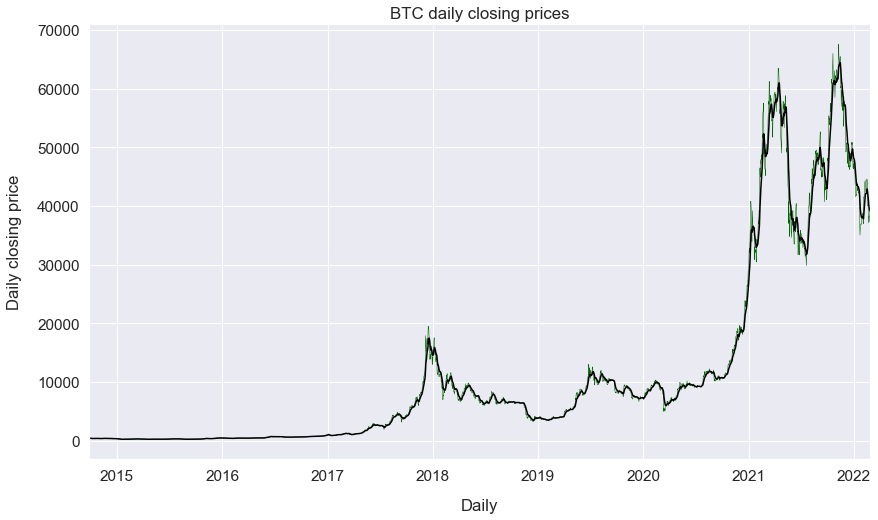

In [12]:
sns.set(font_scale=1.4)
f = df_close['Close'].plot(figsize=(14,8), linewidth=0.5, color='darkgreen')
f = df_close['EMA_10'].plot(figsize=(14,8), linewidth=1.5, color='black')
f.set_xlabel('Daily', labelpad=15)
f.set_ylabel('Daily closing price', labelpad=15)
f.set_title('BTC daily closing prices');

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_close[['EMA_10']], df_close[['Close']], test_size=.2)

In [14]:
print(X_test.describe())

             EMA_10
count    543.000000
mean   10698.587774
std    15339.404874
min      225.599912
25%      597.420173
50%     6570.927128
75%    10299.147689
max    64176.842796


In [15]:
print(X_train.describe())

             EMA_10
count   2168.000000
mean   11550.032791
std    16268.834368
min      223.191496
25%      608.740965
50%     6407.363240
75%    10636.682787
max    64411.387714


In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
y_pred

array([[  268.59780744],
       [ 7265.23064921],
       [ 3848.36800826],
       [  280.21295639],
       [ 8971.33771882],
       [ 1075.72557794],
       [  275.28693283],
       [34394.06886985],
       [11652.10674082],
       [10370.71332684],
       [  281.47274443],
       [  268.16672105],
       [  649.95696008],
       [ 3783.72131044],
       [15406.1897645 ],
       [ 9583.54122036],
       [  276.73928379],
       [34453.92289322],
       [34400.72264324],
       [10905.21576063],
       [  456.16011747],
       [  394.82431142],
       [11702.46957975],
       [39586.86755483],
       [ 9738.47443137],
       [  696.23571865],
       [ 6662.05583666],
       [10334.47065417],
       [37352.52155499],
       [ 8062.94450975],
       [48150.17057649],
       [  492.88028015],
       [  493.4590032 ],
       [  326.77392075],
       [ 3510.20718139],
       [ 9201.51966315],
       [  276.16497346],
       [ 2668.83677722],
       [61645.76835914],
       [12613.29785883],


In [18]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.00146842]]
Mean Absolute Error: 525.5427471105385
Coefficient of Determination: 0.9945291195324567


In [19]:
y_train

,Close
Date,
2017-03-10,1116.719971
2018-10-09,6642.640137
2015-02-19,240.283005
2019-07-11,11358.662109
2015-02-08,223.412003
...,...
2015-07-26,292.686005
2017-07-21,2667.760010
2016-06-08,581.645020


In [20]:
df_train = X_train.join(y_train)
df_train

,EMA_10,Close
Date,,
2017-03-10,1190.384760,1116.719971
2018-10-09,6606.273725,6642.640137
2015-02-19,235.738459,240.283005
2019-07-11,11656.270925,11358.662109
2015-02-08,227.143366,223.412003
...,...,...
2015-07-26,283.481327,292.686005
2017-07-21,2422.965324,2667.760010
2016-06-08,557.524491,581.645020


In [21]:
X_test

,EMA_10
Date,
2015-04-18,229.939359
2018-06-12,7216.313251
2017-09-22,3804.460652
2015-10-10,241.537477
2019-06-20,8919.918708
...,...
2021-01-27,32909.264651
2020-02-06,9340.185924
2017-01-02,954.020167


In [22]:
y_pred.shape

(543, 1)

In [23]:
X_test.shape

(543, 1)

In [24]:
#reshape X_test to np.array
X_test_input = np.asarray(X_test)
X_test_input

array([[  229.9393586 ],
       [ 7216.313251  ],
       [ 3804.46065155],
       [  241.53747662],
       [ 8919.91870784],
       [ 1035.88366227],
       [  236.61867593],
       [34305.37328343],
       [11596.75699996],
       [10317.24245407],
       [  242.79541747],
       [  229.5089043 ],
       [  610.73933595],
       [ 3739.9087432 ],
       [15345.33552619],
       [ 9531.22455406],
       [  238.06889736],
       [34365.13954467],
       [34312.01730059],
       [10850.96116325],
       [  417.22665174],
       [  355.98078051],
       [11647.0459934 ],
       [39490.55792605],
       [ 9685.93059122],
       [  656.95023739],
       [ 6614.02285528],
       [10281.05292293],
       [37259.48807961],
       [ 8012.85744803],
       [48041.30483762],
       [  453.89297277],
       [  454.47084725],
       [  288.03017006],
       [ 3466.79565958],
       [ 9149.7631434 ],
       [  237.49542912],
       [ 2626.65893118],
       [61517.11443679],
       [12556.53875275],


In [25]:
# first method: get regression values with scipy stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test_input[:,0], y_pred[:,0])

In [26]:
# second method: get regression values with numpy polyfit
m, b = np.polyfit(X_test['EMA_10'], y_pred, 1)
print(b)

[38.32080068]


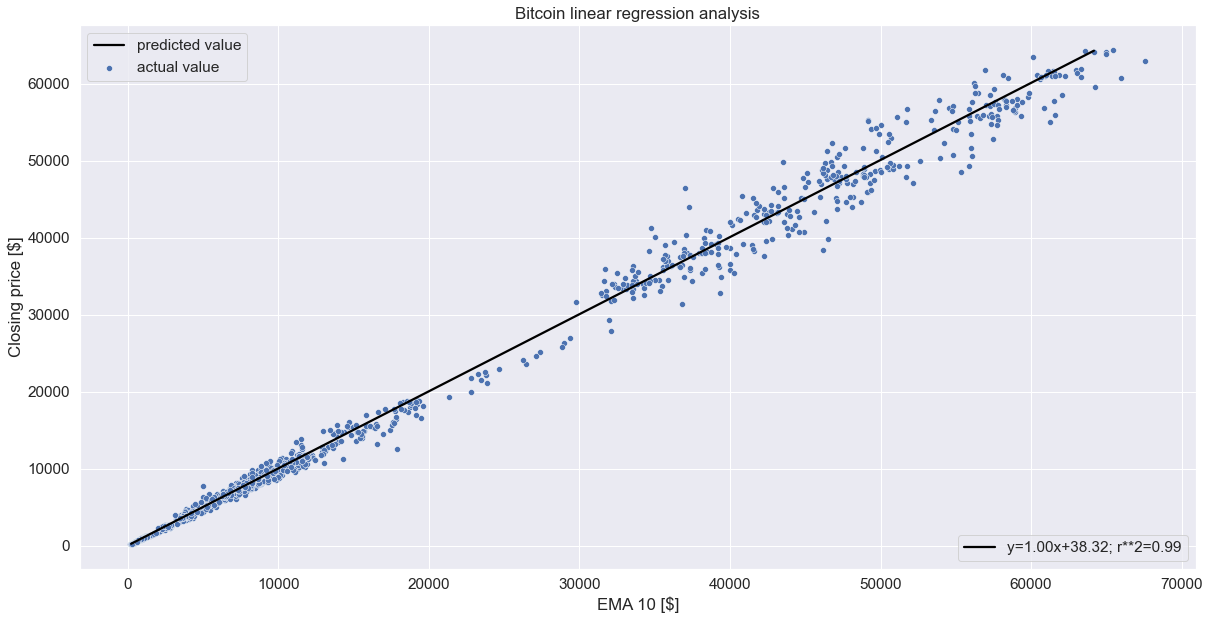

In [27]:
sns.set(font_scale=1.4, rc={'figure.figsize':(20,10)})
ax = sns.scatterplot(data = df_train, x = "Close", y = "EMA_10")

ax = sns.regplot(x=X_test_input, y=y_pred, color='black',scatter=False,
                label = "y={:.2f}x+{:.2f}; r**2={:.2f}".format(slope,intercept, r2_score(y_test, y_pred)))
     
                

ax.set_xlabel('EMA 10 [$]')
ax.set_ylabel('Closing price [$]')
ax.set_title('Bitcoin linear regression analysis')

leg1 = ax.legend(labels=['predicted value', 'actual value'], loc='upper left')
leg2 = ax.legend(loc='lower right')
ax.add_artist(leg1)


In [28]:
df_pred = y_test

In [29]:
df_pred['Close_pred'] = y_pred.tolist()
df_pred['Close_pred'] = df_pred['Close_pred'].str[0]
df_pred

,Close,Close_pred
Date,,
2015-04-18,223.356003,268.597807
2018-06-12,6582.359863,7265.230649
2017-09-22,3630.699951,3848.368008
2015-10-10,244.940994,280.212956
2019-06-20,9527.160156,8971.337719
...,...,...
2021-01-27,30432.546875,32995.910160
2020-02-06,9729.801758,9392.222065
2017-01-02,1021.750000,993.741873


In [30]:
df_pred1 = pd.merge(df_pred, df[['Open']], left_index=True, right_index=True)
df_pred1['Trigger'] = df_pred1['Close_pred'] > df_pred1['Open']
df_pred1['Outcome'] = (df_pred1['Close'] - df_pred1['Open']).where(df_pred1['Trigger'] == True)
df_pred1['Outcome'].count()
#np.sum((df_pred1['Outcome'] > 0).values.ravel())

368

In [31]:
df_pred1['Outcome'][df_pred1['Outcome'] < 0].sum()

-31388.7149810791

In [32]:
df_pred1['Outcome'][df_pred1['Outcome'] > 0].sum()

46625.558990478516

number of trading signals: 361; 
number of negative outcomes: 165;
number of positive outcomes: 196;

sum of negative outcomes: -29955;
sum of positive outcomes: 41589;
Total P&L: **11634**

In [33]:
df_pred2 = df_pred1.dropna()
df_pred2 = df_pred2.sort_values('Date')
df_pred2['P&L'] = df_pred2['Outcome'].cumsum(axis=0)
df_pred2

,Close,Close_pred,Open,Trigger,Outcome,P&L
Date,,,,,,
2014-09-30,386.944000,437.291897,376.088013,True,10.855988,10.855988
2014-10-12,378.549011,400.844297,362.605988,True,15.943024,26.799011
2014-10-15,394.773010,416.069663,400.954987,True,-6.181976,20.617035
2014-10-18,391.441986,420.295045,383.976013,True,7.465973,28.083008
2014-10-28,357.618011,402.265881,353.214996,True,4.403015,32.486023
...,...,...,...,...,...,...
2022-01-24,36654.328125,39036.213415,36275.734375,True,378.593750,15458.265884
2022-01-26,36852.121094,38359.934921,36950.515625,True,-98.394531,15359.871353
2022-01-28,37784.332031,38104.407780,37128.445312,True,655.886719,16015.758072


Text(0.5, 1.0, 'Performance of Bitcoin price prediction')

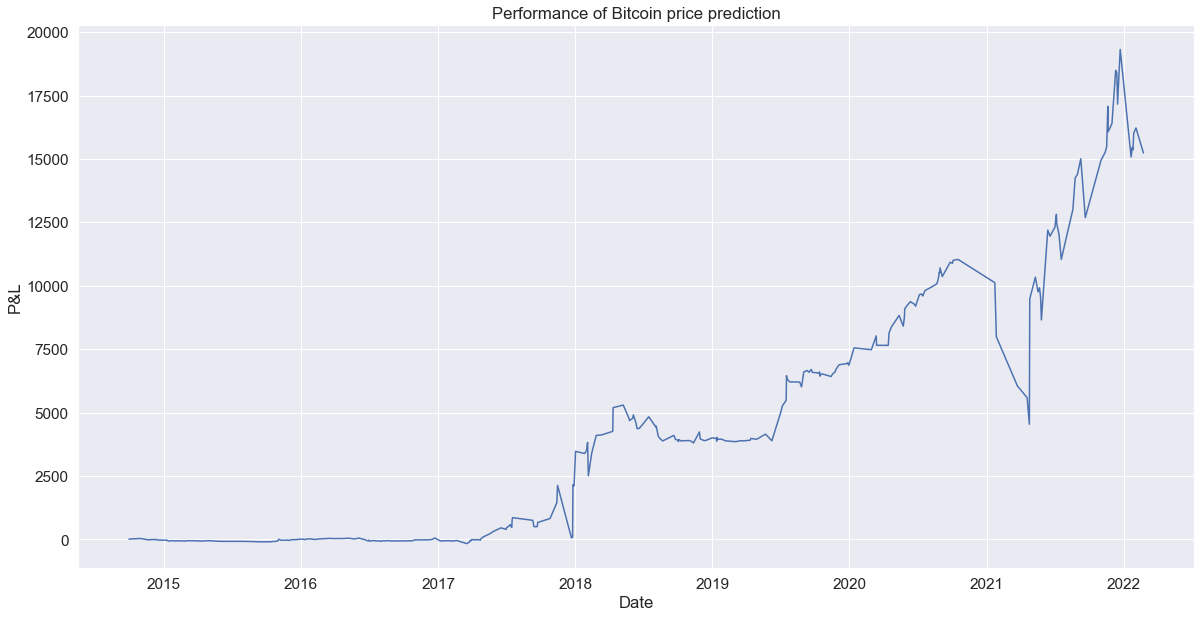

In [38]:
sns.set(font_scale=1.4, rc={'figure.figsize':(20,10)})
ax = sns.lineplot(data = df_pred2, x = "Date", y = "P&L")
ax.set_title('Performance of Bitcoin price prediction')